In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon

# Part 1. Data Exploration. 

In [34]:
df = pd.read_csv('timeBOAK.csv', header=0)
print(df)

   CarrierCode  FlightID   TailID Departure Arrival Scheduled_Departure_Date  \
0          SWA       238   SWA238       LAX     OAK                9/12/2007   
1          SWA      1700  SWA1700       RNO     OAK                9/12/2007   
2          BTA      7803  BTA7803       LAX     OAK                9/12/2007   
3          SWA       654   SWA654       SLC     OAK                9/12/2007   
4          SWA      3226  SWA3226       ONT     OAK                9/12/2007   
..         ...       ...      ...       ...     ...                      ...   
56         SWA      1109  SWA1109       SNA     OAK                9/12/2007   
57         BTA      7813  BTA7813       LAX     OAK                9/12/2007   
58         SWA       342   SWA342       HOU     OAK                9/12/2007   
59         SWA      2843  SWA2843       SEA     OAK                9/12/2007   
60         SWA       247   SWA247       SLC     OAK                9/12/2007   

   Equipment_Code Actual_Gate_In  Min_B

Mean:  4.639344262295082 STD:  2.902981999262284


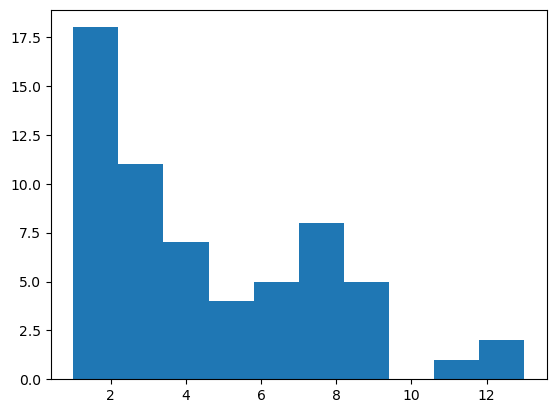

In [35]:
# a. Plot the hist of the time between arrivals, compute sample mean and standard deviation. 
iat = df.Min_Between_Arrivals
plt.hist(iat)
print('Mean: ', np.mean(df.Min_Between_Arrivals), 'STD: ', np.std(df.Min_Between_Arrivals))

(array([28., 24., 19., 15.,  8.,  1.,  1.,  3.,  0.,  1.]),
 array([ 0.05508129,  2.74562887,  5.43617645,  8.12672402, 10.8172716 ,
        13.50781918, 16.19836675, 18.88891433, 21.57946191, 24.27000948,
        26.96055706]),
 <BarContainer object of 10 artists>)

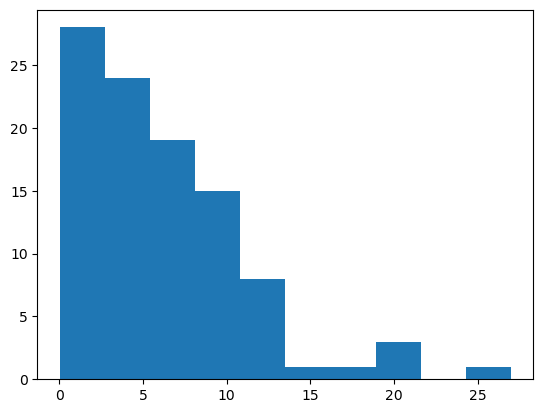

In [36]:
# b. Calculate and plot the theoetical PDF having the mean in part (a) for the exponential dist. 
# (Calculate means report your PDF values, plot means display your plot)

iat_exppdf = np.random.exponential(np.mean(iat), 100)
plt.hist(iat_exppdf)

(array([ 6., 11.,  8., 12., 14., 16.,  9.,  9.,  4., 11.]),
 array([ 1.01060224,  2.18598515,  3.36136807,  4.53675098,  5.7121339 ,
         6.88751682,  8.06289973,  9.23828265, 10.41366557, 11.58904848,
        12.7644314 ]),
 <BarContainer object of 10 artists>)

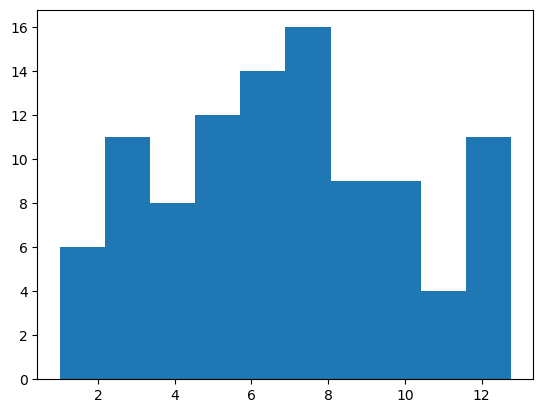

In [37]:
# c. Calculate and plot the theretical PDF having the mean in part (a) for the uniform distribition. 
iat_unifpdf = np.random.uniform(np.min(iat), np.max(iat), 100)
plt.hist(iat_unifpdf)

In [38]:
# d. Compare your histogram with the PDFs you generated. 
#  Which PDF is more similar to your histogram? 
# What does this tell you about how your data is more likely distributed: exponential or uniform? 

# exponential pdf가 더 가까움

# Part 2. Chisquare distribution 

In [39]:
# a. Generate two vectors Z1 and Z2, such that each vector contains 10000 random numbers drawn from standard normal dist. 
Z1 = np.random.standard_normal(10000)
Z2 = np.random.standard_normal(10000)


In [40]:
# b. Creat a vector myK2
myK2 = Z1**2 + Z2**2

In [41]:
# c. Generate a vector K2 containing 10000 random numbers drawn from Chisquare (df: 2)
K2 = np.random.chisquare(df=2, size=10000)

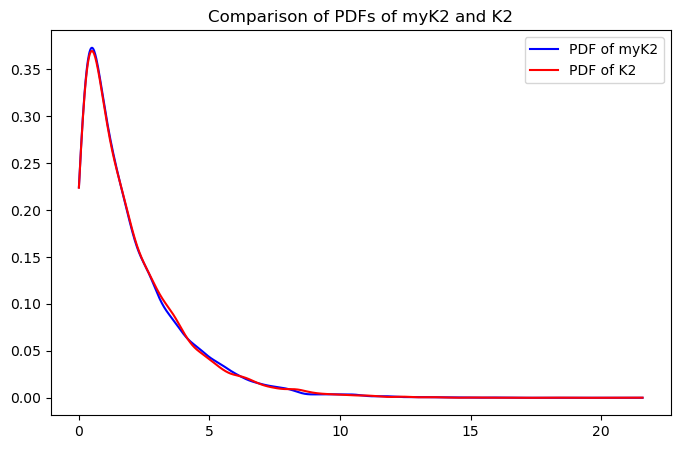

In [42]:
# d. Plot the PDFs of myK2 and K2, do you think they are coincide? 
# Provide your code. 
from scipy.stats import gaussian_kde

# Estimate the PDFs
kde_myK2 = gaussian_kde(myK2)
kde_K2 = gaussian_kde(K2)

# Create a range of x values
x = np.linspace(0, max(np.max(myK2), np.max(K2)), 1000)

# Evaluate the PDFs on the x values
pdf_myK2 = kde_myK2(x)
pdf_K2 = kde_K2(x)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, pdf_myK2, label='PDF of myK2', color='blue')
plt.plot(x, pdf_K2, label='PDF of K2', color='red')
plt.title('Comparison of PDFs of myK2 and K2')
plt.legend()
plt.show()

# Part 3. Sum of two random variables 

In [43]:
# a. K3
K3 = np.random.chisquare(df=3, size=10000)
# b. K5
K5 = np.random.chisquare(df=5, size=10000)
# c. K8
K8 = np.random.chisquare(df=8, size=10000)

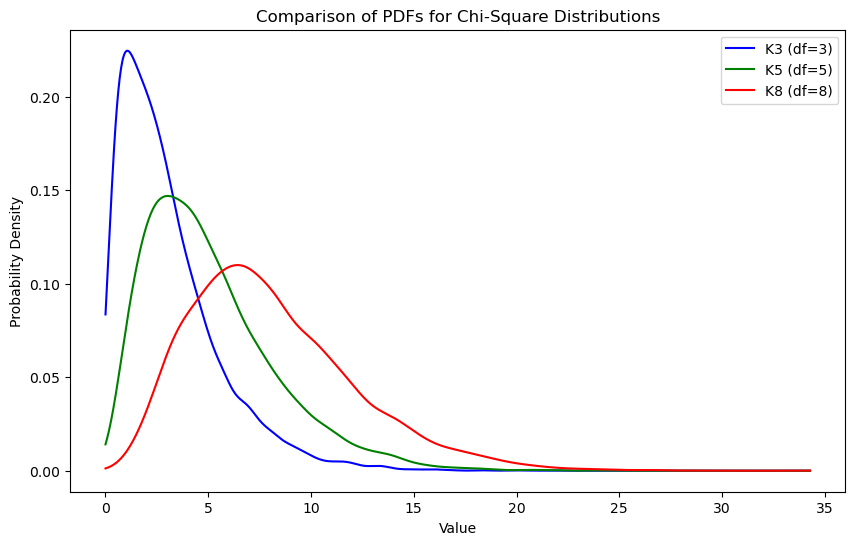

In [44]:
# d. Plot PDFs and compare the two. 
# Provide your code. 
from scipy.stats import gaussian_kde

# Estimate the PDFs
kde_K3 = gaussian_kde(K3)
kde_K5 = gaussian_kde(K5)
kde_K8 = gaussian_kde(K8)

# Create a range of x values for plotting
x_min = min(min(K3), min(K5), min(K8))
x_max = max(max(K3), max(K5), max(K8))
x = np.linspace(x_min, x_max, 1000)

# Plot the PDFs
plt.figure(figsize=(10, 6))
plt.plot(x, kde_K3(x), label='K3 (df=3)', color='blue')
plt.plot(x, kde_K5(x), label='K5 (df=5)', color='green')
plt.plot(x, kde_K8(x), label='K8 (df=8)', color='red')

plt.title('Comparison of PDFs for Chi-Square Distributions')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

# Part 4. Student t distribution

In [45]:
# a. Generate vector Z 
Z = np.random.standard_normal(10000)
# b. Generate vector myT3
myT3 = Z/np.sqrt(K3/3)
# c. Generate vector T3
T3 = np.random.standard_t(df=3, size=10000)

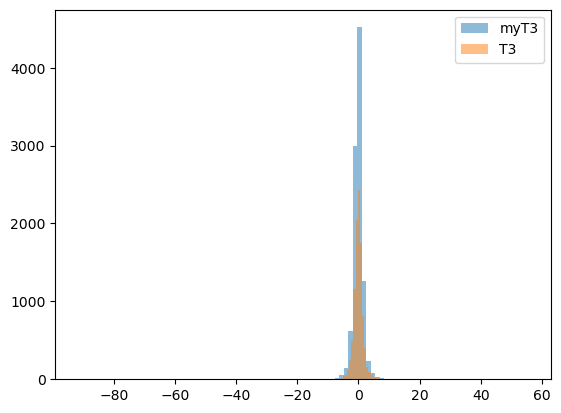

In [46]:
# d. Plot the pdfs of myT3 and T3 and compare. 
plt.hist(myT3, 100, alpha=0.5, label='myT3')
plt.hist(T3, 100, alpha=0.5, label='T3')
plt.legend(loc='upper right')
plt.show()

In [47]:
# e. Generate T6 with 10000 random numbers from T-dist with DF=6
T6 = np.random.standard_t(df=6, size=10000)

# f. Generate T12 with 10000 random numbers from T-dist with DF=12
T12 = np.random.standard_t(df=12, size=10000)

# g. Generate T25 with 10000 random numbers from T-dist with DF=25
T25 = np.random.standard_t(df=25, size=10000)

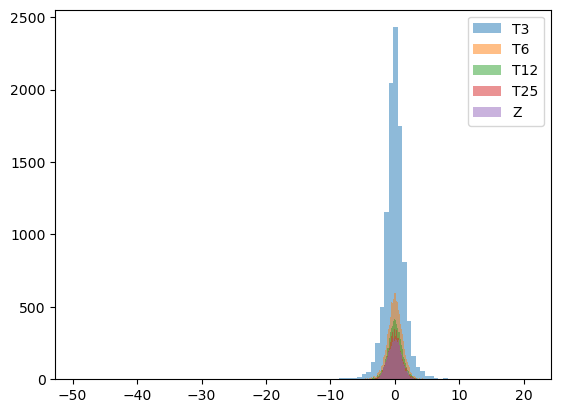

In [49]:
# h. Plot distribution of T3, T6, T12, T25 and Z together
# Provide your code.
plt.hist(T3, 100, alpha=0.5, label='T3')
plt.hist(T6, 100, alpha=0.5, label='T6')
plt.hist(T12, 100, alpha=0.5, label='T12')
plt.hist(T25, 100, alpha=0.5, label='T25')
plt.hist(Z, 100, alpha=0.5, label='Z')
plt.legend(loc='upper right')
plt.show()